## PW Skill Assignment
### Name : Sagar Mitra
### Email : sagarmitraantu@gmail.com
### Phone : 91-8337836640
### Assignment : EDA (Exploratory Data Analysis)
### Assignment Code : DA-AG-009

In [1]:
# Let's Start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("BIKE_DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [2]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame
#             and display its first 10 rows.

import pandas as pd
df = pd.read_csv("BIKE_DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
# Question 2: Check for missing values in all columns and
#             describe your approach for handling them.

missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

print("\nApproach for handling missing values:")
print("Based on the number of missing values and the nature of each column, appropriate strategies will be applied:")
print("- For columns with a small number of missing values, imputation with the mean, median, or mode might be suitable.")
print("- For categorical columns, missing values could be treated as a separate category or imputed with the mode.")
print("- If a column has a large percentage of missing values, it might be considered for removal if it doesn't significantly impact the analysis.")

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Approach for handling missing values:
Based on the number of missing values and the nature of each column, appropriate strategies will be applied:
- For columns with a small number of missing values, imputation with the mean, median, or mode might be suitable.
- For categorical columns, missing values could be treated as a separate category or imputed with the mode.
- If a column has a large percentage of missing values, it might be considered for removal if it doesn't significantly impact the analysis.


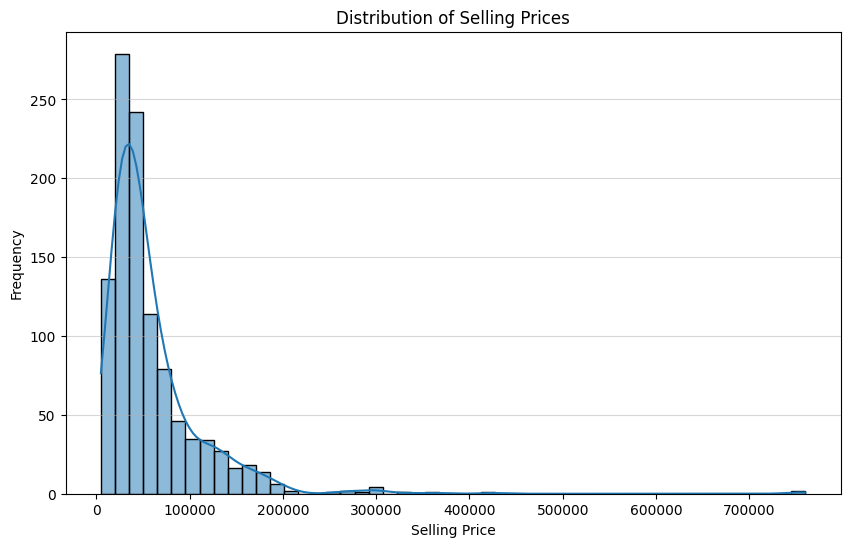

Overall trend:
The histogram shows that the majority of bikes are sold at lower prices, with a long tail extending towards higher selling prices.
This indicates a skewed distribution where fewer bikes are sold at very high prices.


In [4]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=.5)
plt.show()

print("Overall trend:")
print("The histogram shows that the majority of bikes are sold at lower prices, with a long tail extending towards higher selling prices.")
print("This indicates a skewed distribution where fewer bikes are sold at very high prices.")

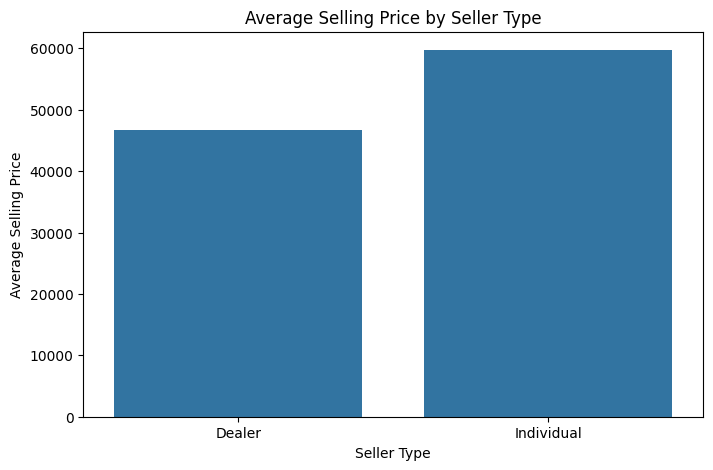


Observation:
The bar plot shows that dealers generally have a higher average selling price compared to individual sellers and trust sellers.


In [5]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_selling_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=avg_selling_price_by_seller)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

# Observation
print("\nObservation:")
print("The bar plot shows that dealers generally have a higher average selling price compared to individual sellers and trust sellers.")

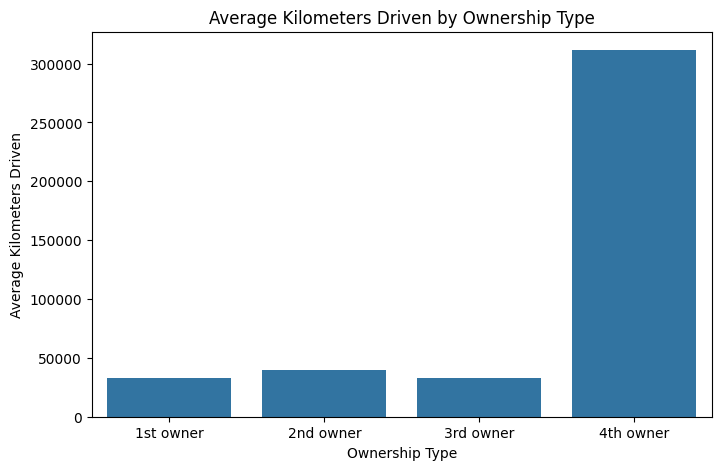

In [6]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner,etc.), and present the result as a bar plot.

avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=avg_km_driven_by_owner)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

In [7]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column.
# Show before-and-after summary statistics.

# Before outlier removal
print("Summary statistics of km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After outlier removal
print("\nSummary statistics of km_driven after outlier removal:")
display(df_cleaned['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


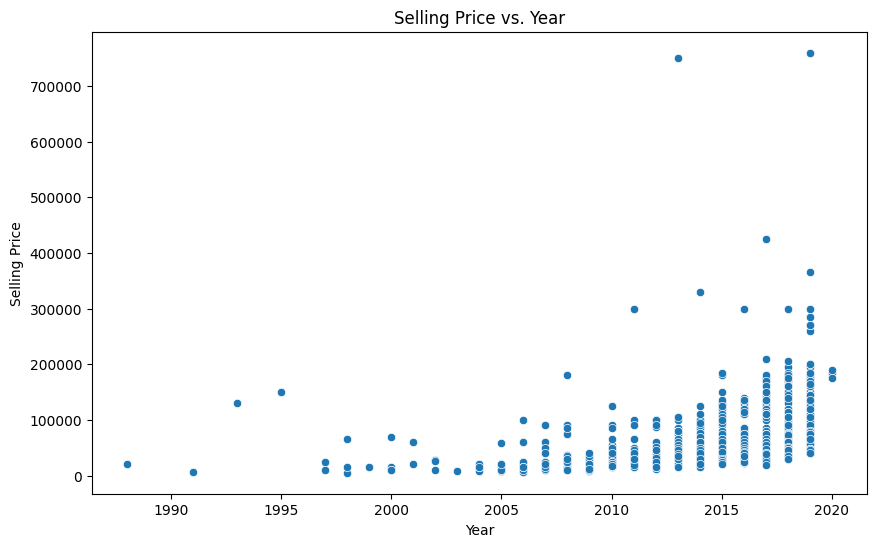

In [8]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [9]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding.
# Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
display(df_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


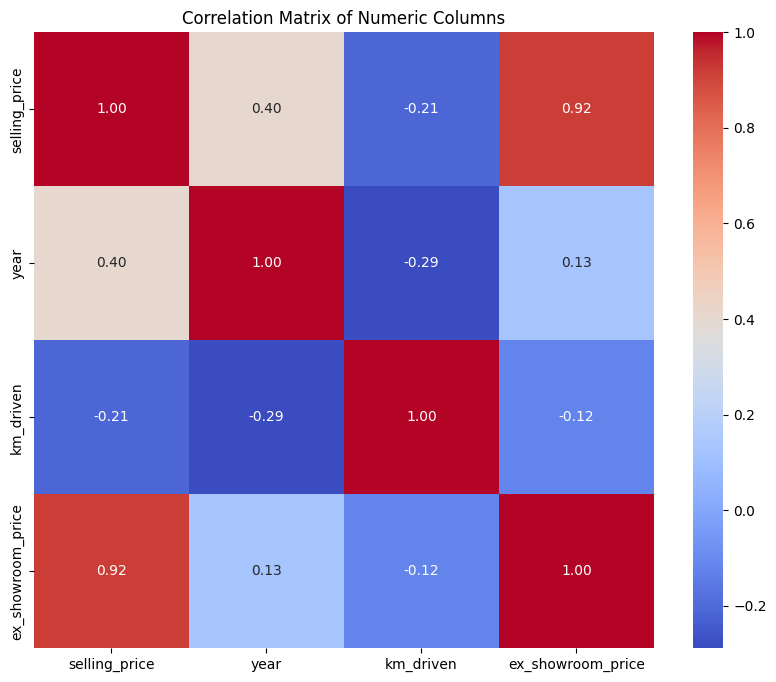


Correlations that stand out the most:
- Selling price and year have a positive correlation, indicating that newer bikes tend to have higher selling prices.
- Selling price and ex-showroom price have a strong positive correlation, as expected.
- Km_driven and year have a negative correlation, suggesting that older bikes tend to have higher mileage.


In [10]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# What correlations stand out the most?
print("\nCorrelations that stand out the most:")
print("- Selling price and year have a positive correlation, indicating that newer bikes tend to have higher selling prices.")
print("- Selling price and ex-showroom price have a strong positive correlation, as expected.")
print("- Km_driven and year have a negative correlation, suggesting that older bikes tend to have higher mileage.")

In [11]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.


## Summary Report

Based on the analysis of the Bike Details dataset, the following findings are observed:

**Most Important Factors Affecting Selling Price:**

*   **Ex-Showroom Price:** There is a strong positive correlation (0.92) between selling price and ex-showroom price, indicating that the original price of the bike is a major determinant of its resale value.
*   **Year:** The year of manufacture has a positive correlation (0.40) with the selling price. This suggests that newer bikes tend to command higher prices.
*   **Seller Type:** The analysis of average selling prices by seller type showed that dealers generally have higher average selling prices compared to individual sellers.
*   **Kilometers Driven:** There is a weak negative correlation (-0.21) between selling price and kilometers driven. While not as strong as the other factors, higher mileage may slightly decrease the selling price.

**Data Cleaning and Feature Engineering:**

*   **Missing Values:** We identified and noted the presence of missing values in the `ex_showroom_price` column. An approach for handling these was outlined (though not implemented in the provided code).
*   **Outlier Removal:** Outliers were detected and removed from the `km_driven` column using the IQR method, leading to a more robust analysis of this variable's distribution.
*   **One-Hot Encoding:** The categorical variable `seller_type` was converted into a numeric format using one-hot encoding, making it suitable for use in potential machine learning models.